In [1]:
import pandas as pd
import requests
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 125)

url = 'https://raw.githubusercontent.com/KasperLoos/ConsultElement/main/data/bronze_data/startup_failures.csv'
response = requests.get(url)

# Save the content of the file
with open('startup_failures.csv', 'wb') as file:
    file.write(response.content)

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('startup_failures.csv')

In [2]:
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01


In [3]:
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'].replace({'$': '', ',': ''}, regex=True), errors='coerce')
# Calculate the time difference between 'founded_at' and 'first_funding_at'
df['time_before_first_funding'] = df['first_funding_at'] - df['founded_at']

# Calculate the time difference between 'first_funding_at' and 'last_funding_at'
df['time_between_first_last_funding'] = df['last_funding_at'] - df['first_funding_at']
df['founded_year'] = df['founded_at'].dt.year
df['founded_month'] = df['founded_at'].dt.month
df['funding_year'] = df['first_funding_at'].dt.year
df['funding_month'] = df['first_funding_at'].dt.month

In [4]:
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_funding,time_between_first_last_funding,founded_year,founded_month,funding_year,funding_month
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05,NaT,0 days,NaN,NaN,2015.0,1.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,-187 days,227 days,2014.0,9.0,2014.0,3.0
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaT,2014-01-30,2014-01-30,NaT,0 days,NaN,NaN,2014.0,1.0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,443 days,0 days,2007.0,1.0,2008.0,3.0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,1665 days,0 days,2010.0,1.0,2014.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301.0,operating,CHN,22,Beijing,Beijing,1,NaT,2012-04-01,2012-04-01,NaT,0 days,NaN,NaN,2012.0,4.0
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304.0,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01,-194 days,851 days,2012.0,5.0,2011.0,11.0
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,NaN,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01,1308 days,0 days,2011.0,1.0,2014.0,8.0
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192.0,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01,365 days,0 days,2014.0,1.0,2015.0,1.0


In [6]:
df['average_funding'] = df['funding_total_usd'] / df['funding_rounds']

In [7]:
df['failed'] = df['status'].apply(lambda x: 1 if x == 'closed' else 0)
df['has_website'] = df['homepage_url'].apply(lambda x: 1 if pd.notna(x) and x.strip() != '' else 0)
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_funding,time_between_first_last_funding,founded_year,founded_month,funding_year,funding_month,average_funding,failed,has_website
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05,NaT,0 days,NaN,NaN,2015.0,1.0,10000000.0,0,1
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,-187 days,227 days,2014.0,9.0,2014.0,3.0,350000.0,0,1
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaT,2014-01-30,2014-01-30,NaT,0 days,NaN,NaN,2014.0,1.0,3406878.0,0,1
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,443 days,0 days,2007.0,1.0,2008.0,3.0,2000000.0,0,1
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,1665 days,0 days,2010.0,1.0,2014.0,7.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301.0,operating,CHN,22,Beijing,Beijing,1,NaT,2012-04-01,2012-04-01,NaT,0 days,NaN,NaN,2012.0,4.0,1587301.0,0,1
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304.0,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01,-194 days,851 days,2012.0,5.0,2011.0,11.0,28576.0,0,1
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,NaN,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01,1308 days,0 days,2011.0,1.0,2014.0,8.0,NaN,0,1
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192.0,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01,365 days,0 days,2014.0,1.0,2015.0,1.0,18192.0,0,1


In [34]:
import re


def clean_category(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = text.replace('|', ' ')  # Replace '|' with space
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove punctuation/symbols
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize spaces
    return text

df['category_list_cleaned'] = df['category_list'].apply(clean_category)
df[['category_list', 'category_list_cleaned']].head(10)

,category_list,category_list_cleaned
0,Media,media
1,Application Platforms|Real Time|Social Network...,application platforms real time social network...
2,Apps|Games|Mobile,apps games mobile
3,Curated Web,curated web
4,Software,software
5,Games,games
6,Biotechnology,biotechnology
7,Analytics,analytics
8,Mobile,mobile
9,E-Commerce,ecommerce


In [37]:
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to lemmatize a text
def lemmatize_text(text):
    # Process the text through spaCy
    doc = nlp(text)
    # Lemmatize each word and join them back
    return ' '.join([token.lemma_ for token in doc])

# Apply lemmatization to 'category_list_cleaned'
df['category_list_lemmatized'] = df['category_list_cleaned'].apply(lemmatize_text)

# Print the first few rows to check the result
df[['category_list_cleaned', 'category_list_lemmatized']]


                               category_list_cleaned  \
0                                              media   
1  application platforms real time social network...   
2                                  apps games mobile   
3                                        curated web   
4                                           software   

                            category_list_lemmatized  
0                                             medium  
1  application platform real time social network ...  
2                                  apps games mobile  
3                                         curate web  
4                                           software  


In [44]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kkasp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
unique_categories_lemma = df['category_list_lemmatized'].dropna().unique()
print(unique_categories_lemma.shape)
unique_categories_clean = df['category_list_cleaned'].dropna().unique()
print(unique_categories_clean.shape)

(27254,)
(27273,)


In [55]:
all_words = [word for cat in unique_categories_clean for word in cat.split()]
all_words
# Get unique words
unique_words = sorted(set(all_words))  # sorted is optional

# Join into a single space-separated string
unique_words_string = ' '.join(unique_words)

print(unique_words_string)
# Length of unique words list
unique_words_length = len(unique_words)

print(f"Number of unique words: {unique_words_length}")

20 3d 7 accessories accounting active activists ad adaptive adherence adults advanced adventure advertising advice aerospace africa agent agriculture aid air algorithms all alternative alumni analytics and android angels animal anything apis app application applications apps aquaculture architecture archiving art artificial artists arts asia assessment asset assisitive assisted auctions audio audiobooks augmented auto automated automation automotive b2b babies baby banking based batteries beauty beer behavior benefits bicycles bid big billing biofuels bioinformatics biomass biometrics biopharm biotechnology bitcoin blogging boating bookmarking boomers bpo brand branding breakthrough brewing bridging broadcasting broker brokers browser browsers builders building business businesses buying cable cad call campuses cannabis capital capture carbon card cards care career cars casual cause celebrity cells center centers certification chain charities charity charter chat chemicals child childr

In [189]:
# Define categories and the associated keywords
categories = {
    'Legal': ['legal', 'licensing', 'law'],
    'Marketing & PR': ['marketing', 'advertisements', 'advertising', 'public relations'],
    'dating & adult': ['dating', 'matchmaking', 'wedding', 'sex', 'adult', 'gay', 'lesbian'],
    'art & creative': ['art', 'photography', 'video', 'design', 'graphics', 'creative', 'film'],
    'Entertainment': ['lotteries', 'gambling','nightclubs', 'nightlife', 'sporting', 'sports', 'music', 'movies', 'games', 'game', 'gamification', 'gaming', 'sports', 'comics', 'entertainment', 'tv', 'ebooks', 'books', 'audiobooks', 'publishing'],
    'Healthcare and wellness': ['clinical','care','dental','wellness','medicine', 'healthcare', 'hospitals', 'doctors', 'medication', 'pharmaceuticals', 'pharmacies', 'health', 'emergencyhealth', 'medical'],
    'Finance & Business': ['financial','fraud','accounting', 'investment ', 'insurance','payments', 'finance', 'banking', 'investing', 'capital', 'business', 'entrepreneurship', 'economy', 'venture', 'ventures'],
    'Retail & E-commerce': ['shopping', 'products', 'retail', 'stores', 'marketplaces', 'ecommerce', 'sales'],
    '(Social) Media & Communication': ['journalism','broadcasting', 'content', 'news', 'social', 'messaging', 'newsletters', 'polling', 'chat', 'communication', 'sms', 'blogging', 'email', 'media', 'telecommunications', 'telephony'],
    'Education': ['education', 'learning', 'school', 'schools', 'universities', 'courses', 'teachers', 'tutorials', 'students', 'alumni'],
    'Energy & Environment': ['biofuels', 'energy', 'solar', 'wind', 'green', 'sustainability', 'renewable', 'clean', 'environmental', 'oil', 'gas'],
    'Lifestyle & Consumer Goods': ['lingerie', 'shoes','jewelry', 'wearables','fashion', 'fitness', 'lifestyle', 'leisure', 'beauty', 'home', 'food', 'luxury', 'gadgets', 'cosmetics', 'furniture'],
    'Transport': ['taxis','distribution','mobility','parking','bicycles', 'boating','shipping','distribution','delivery', 'automotive', 'cars', 'vehicles', 'transportation', 'driving', 'motors', 'navigation', 'limousines'],
    'Science & Research': ['science', 'research', 'biometrics', 'neuroscience', 'genetic','biopharm', 'biology', 'chemistry', 'physics', 'engineering'],
    'Data': ['analytics', 'data', 'databases'],
    'Animal': ['veterinary', 'pets', 'pet', 'animal', 'animals'],
    'Hospitality': ['hospitality', 'restaurants'],
    'Crypto' : ['bitcoin', 'fintech', 'cryptocurrency'],
    '(3D) Printing': ['printing', '3d'],
    'real estate': ['estate', 'realtors', 'realtor', 'housing'],
    'security': ['security', 'safety'],
    'tourism': ['travel', 'tourism', 'vacation', 'hotels'],
    'manufacturing & construction': ['manufacturing', 'construction'],
    'consulting': ['consulting'],
    'Chemical': ['chemicals'],
    'Charity & Non-profit': ['charity', 'non profit', 'nonprofits', 'nonprofit', 'charities'],
    'Children':['children', 'kids', 'baby', 'toys', 'toy', 'child', 'babies', 'parenting'],
    'HR': ['human', 'employment', 'recruiting', 'staffing', 'incubators', 'training'],
    'waste': ['waste', 'water purification'],
    'nutrition & cooking': ['nutrition','food', 'drinks', 'beer', 'wine', 'brewing', 'fruit', 'tea', 'coffee', 'recipes', 'cooking'],
    'agriculture': ['agriculture', 'farming', 'farm'],
    'Service Sector' : ['services', 'service'],
    'consumer': ['consumer'],
    'logistics': ['logistics'],
    'management': ['management'],
    'raw materials': ['extraction', 'gold', 'glass', 'resources', 'minerals'],
    'politics': ['politics', 'government', 'governments'],
    'Technology & internet': ['translation','online', 'drones','iphone', 'ios', 'algorithms', 'digital','algorithms ','image recognition', 'lighting','processing', 'transfer','sensors','maps','augmented reality', 'computer','linux','technologies','hardware','voip','wireless','electronics', 'electrical ', 'saas','semiconductors','aerospace', 'apps', 'robotics', 'twitter', 'application', 'mobile', 'virtual', 'android', 'api', 'applications', 'automation', 'big', 'cloud', 'computers', 'cybersecurity', 'data', 'iot', 'machine', 'networking', 'software', 'web', 'internet', 'technology'],
    'search': ['search']
}

def categorize(row):
    for category, keywords in categories.items():
        if any(keyword in row for keyword in keywords):
            return category
    return 'Other'  # Return 'Other' if no category matches

# Apply the categorization
df['sector'] = df['category_list_cleaned'].apply(categorize)


In [190]:
other = df[df['sector']=='Other']
print(other.shape)
other[other['category_list_cleaned'].str.strip() != ''][['name', 'category_list', 'category_list_cleaned', 'sector', 'failed']].head(100)

(3540, 26)


,name,category_list,category_list_cleaned,sector,failed
388,4th Office,Office Space,office space,Other,0
1919,AgentRave,Reviews and Recommendations,reviews and recommendations,Other,1
2046,AHA Taxis,Tracking,tracking,Other,0
2561,Alliance Medical Corporation,Industrial|Mechanical Solutions,industrial mechanical solutions,Other,0
3058,Amp Your Good,Crowdfunding,crowdfunding,Other,0
3284,AngelVest,Angels,angels,Other,0
3427,Hornetsecurity,Local,local,Other,0
3862,AppSheet,Developer Tools,developer tools,Other,0
4006,Aquaminerals Finland Oy,Water,water,Other,0
4155,Arcturus Therapeutics Inc.,Therapeutics,therapeutics,Other,0


In [191]:
leftoverwords = other['category_list_cleaned'].dropna()
leftoverwords

56        
71        
79        
109       
113       
        ..
66112     
66115     
66120     
66298     
66365     
Name: category_list_cleaned, Length: 3540, dtype: object

In [192]:
from collections import Counter

# Generate the list of words
all_words = [word for cat in leftoverwords for word in cat.split()]

# Get the frequency of each word
word_freq = Counter(all_words)

# Print the top 10 most common words
print(word_freq.most_common(1500))


[('enterprises', 24), ('events', 24), ('communities', 21), ('crowdfunding', 15), ('storage', 15), ('development', 14), ('platforms', 14), ('utilities', 12), ('therapeutics', 11), ('and', 10), ('outsourcing', 10), ('reviews', 8), ('recommendations', 8), ('tracking', 8), ('industrial', 8), ('peertopeer', 8), ('trading', 8), ('ticketing', 7), ('b2b', 7), ('sharing', 7), ('crowdsourcing', 7), ('entrepreneur', 7), ('gift', 7), ('mechanical', 6), ('solutions', 6), ('collaborative', 6), ('consumption', 6), ('cannabis', 6), ('advanced', 6), ('materials', 6), ('photo', 6), ('systems', 6), ('crm', 6), ('collaboration', 6), ('card', 6), ('water', 5), ('diagnostics', 5), ('developer', 4), ('tools', 4), ('wholesale', 4), ('edtech', 4), ('markets', 4), ('textiles', 4), ('reputation', 4), ('defense', 4), ('lead', 3), ('generation', 3), ('classifieds', 3), ('optimization', 3), ('auctions', 3), ('nontech', 3), ('all', 3), ('recycling', 3), ('civil', 3), ('engineers', 3), ('watch', 3), ('price', 3), ('c

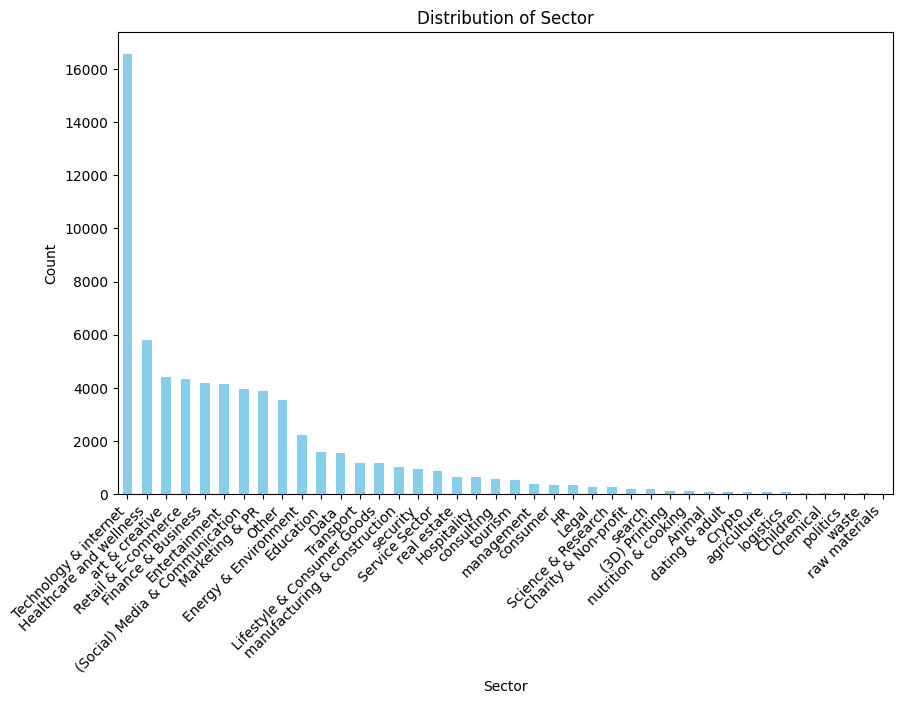

In [193]:
# Get the distribution of 'sector' column
sector_distribution = df['sector'].value_counts()
import matplotlib.pyplot as plt

# Plot the distribution
sector_distribution.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribution of Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [194]:
df['funding_total_usd'].fillna(df['funding_total_usd'].mean(), inplace=True)

C:\Users\kkasp\AppData\Local\Temp\ipykernel_13480\3226773229.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['funding_total_usd'].fillna(df['funding_total_usd'].mean(), inplace=True)


In [195]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [196]:
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_funding,time_between_first_last_funding,founded_year,founded_month,funding_year,funding_month,average_funding,failed,has_website,category_list_cleaned,sector,category_list_lemmatized
0,/organization/-fame,#fame,http://livfame.com,Media,1.000000e+07,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05,NaT,0 days,NaN,NaN,2015.0,1.0,10000000.0,0,1,media,(Social) Media & Communication,medium
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,7.000000e+05,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,-187 days,227 days,2014.0,9.0,2014.0,3.0,350000.0,0,1,application platforms real time social network...,(Social) Media & Communication,application platform real time social network ...
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3.406878e+06,operating,NaN,NaN,NaN,NaN,1,NaT,2014-01-30,2014-01-30,NaT,0 days,NaN,NaN,2014.0,1.0,3406878.0,0,1,apps games mobile,Entertainment,apps games mobile
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2.000000e+06,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,443 days,0 days,2007.0,1.0,2008.0,3.0,2000000.0,0,1,curated web,Technology & internet,curate web
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,1.847860e+07,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,1665 days,0 days,2010.0,1.0,2014.0,7.0,NaN,0,1,software,Technology & internet,software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1.587301e+06,operating,CHN,22,Beijing,Beijing,1,NaT,2012-04-01,2012-04-01,NaT,0 days,NaN,NaN,2012.0,4.0,1587301.0,0,1,enterprise software,Technology & internet,enterprise software
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,1.143040e+05,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01,-194 days,851 days,2012.0,5.0,2011.0,11.0,28576.0,0,1,advertising mobile web development wireless,Marketing & PR,advertise mobile web development wireless
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,1.847860e+07,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01,1308 days,0 days,2011.0,1.0,2014.0,8.0,NaN,0,1,,Other,
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,1.819200e+04,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01,365 days,0 days,2014.0,1.0,2015.0,1.0,18192.0,0,1,consumer electronics internet of things teleco...,(Social) Media & Communication,consumer electronic internet of thing telecomm...


In [197]:
df = df[['sector','funding_total_usd','country_code','state_code','region','city', 'funding_rounds', 'time_before_first_funding', 'time_between_first_last_funding', 'founded_year', 'founded_month', 'funding_year', 'funding_month', 'average_funding', 'has_website', 'failed']]

In [198]:
df['time_before_first_funding'] = df['time_before_first_funding'].dt.days
df['time_between_first_last_funding'] = df['time_between_first_last_funding'].dt.days
df

C:\Users\kkasp\AppData\Local\Temp\ipykernel_13480\2588971132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_before_first_funding'] = df['time_before_first_funding'].dt.days
C:\Users\kkasp\AppData\Local\Temp\ipykernel_13480\2588971132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_between_first_last_funding'] = df['time_between_first_last_funding'].dt.days


,sector,funding_total_usd,country_code,state_code,region,city,funding_rounds,time_before_first_funding,time_between_first_last_funding,founded_year,founded_month,funding_year,funding_month,average_funding,has_website,failed
0,(Social) Media & Communication,1.000000e+07,IND,16,Mumbai,Mumbai,1,NaN,0.0,NaN,NaN,2015.0,1.0,10000000.0,1,0
1,(Social) Media & Communication,7.000000e+05,USA,DE,DE - Other,Delaware City,2,-187.0,227.0,2014.0,9.0,2014.0,3.0,350000.0,1,0
2,Entertainment,3.406878e+06,NaN,NaN,NaN,NaN,1,NaN,0.0,NaN,NaN,2014.0,1.0,3406878.0,1,0
3,Technology & internet,2.000000e+06,CHN,22,Beijing,Beijing,1,443.0,0.0,2007.0,1.0,2008.0,3.0,2000000.0,1,0
4,Technology & internet,1.847860e+07,USA,IL,"Springfield, Illinois",Champaign,1,1665.0,0.0,2010.0,1.0,2014.0,7.0,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,Technology & internet,1.587301e+06,CHN,22,Beijing,Beijing,1,NaN,0.0,NaN,NaN,2012.0,4.0,1587301.0,1,0
66364,Marketing & PR,1.143040e+05,HRV,15,Split,Split,4,-194.0,851.0,2012.0,5.0,2011.0,11.0,28576.0,1,0
66365,Other,1.847860e+07,NaN,NaN,NaN,NaN,1,1308.0,0.0,2011.0,1.0,2014.0,8.0,NaN,1,0
66366,(Social) Media & Communication,1.819200e+04,USA,CA,SF Bay Area,San Francisco,1,365.0,0.0,2014.0,1.0,2015.0,1.0,18192.0,1,0


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer
import numpy as np

# Custom penalty score
def custom_loss(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    fn = np.sum((y_true == 1) & (y_pred == 0))  # Missed failures
    fp = np.sum((y_true == 0) & (y_pred == 1))  # Incorrect failure predictions

    loss = 100 * fn + 1 * fp
    return -loss  # We return negative loss because GridSearchCV *maximizes* the score

# Wrap it in a scorer
custom_scorer = make_scorer(custom_loss, greater_is_better=False)


# Define the features (X) and the target (y)
X = df[['sector', 'funding_total_usd', 'country_code', 'state_code', 'region', 'city', 
        'funding_rounds', 'time_before_first_funding', 'time_between_first_last_funding', 
        'founded_year', 'founded_month', 'funding_year', 'funding_month', 'average_funding', 
        'has_website']]
y = df['failed']


# Define categorical columns
categorical_columns = ['sector', 'country_code', 'state_code', 'region', 'city']

# Create the column transformer for one-hot encoding
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
    ],
    remainder='passthrough'  # Keeps the rest of the columns (like numeric ones)
)

X_encoded = column_transformer.fit_transform(X)
feature_names = column_transformer.named_transformers_['onehot'].get_feature_names_out(categorical_columns)

# Convert to DataFrame (if needed)
import pandas as pd
X = pd.DataFrame(X_encoded, columns=list(feature_names) + list(X.drop(columns=categorical_columns).columns))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'max_depth': [6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(eval_metric='logloss'),
                           param_grid=param_grid,
                           cv=3,
                           scoring=custom_scorer,  # 👈 use the custom one
                           verbose=1)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

# Create the XGBoost model
model = xgb.XGBClassifier(scale_pos_weight=(len(y) - sum(y)) / sum(y), eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
loss = custom_loss(y_test, y_pred)
print(f"Custom penalty loss: {-loss}")

Fitting 3 folds for each of 162 candidates, totalling 486 fits


In [ ]:
# Get predicted probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability for the 'failed' class (class 1)

# Adjust the threshold for predicting 'failed=1'
y_pred_adjusted = (y_pred_prob > 0.2).astype(int)

# Evaluate the model using the adjusted predictions
print("Classification Report (with adjusted threshold):")
print(classification_report(y_test, y_pred_adjusted))

In [ ]:
importance = model.feature_importances_

# Map to column names
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model, max_num_features=10, importance_type='cover')  # 'weight', 'gain', 'cover'
plt.show()
